## Observations and Insights 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice.
mice=combined_data["Mouse ID"].count()
mice

1893

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
data_check= combined_data[['Mouse ID','Timepoint']]
#del combined_data['Mouse ID']
#combined_data = combined_data.rename(columns={"Mouse ID":"Country Code"})
#combined_data.head()

data_check.duplicated().sum()
data_check[data_check.duplicated()].head()


,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_data[combined_data.duplicated(subset=['Mouse ID','Timepoint'])].head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data= combined_data.drop_duplicates(subset=['Mouse ID','Timepoint'])
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
mice_total=clean_data['Mouse ID'].count()
mice_total

1888

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
data_group = clean_data.groupby('Drug Regimen')
mean_tumor_volume= data_group['Tumor Volume (mm3)'].mean()
median_tumor_volume = data_group['Tumor Volume (mm3)'].median()
var_tumor_volume = data_group['Tumor Volume (mm3)'].var()
std_tumor_volume =data_group['Tumor Volume (mm3)'].std()


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summary_table=pd.DataFrame({"Mean": mean_tumor_volume,"Median": mean_tumor_volume,"Variance": var_tumor_volume ,"Standard Deviation": std_tumor_volume})
summary_table.head()

,Mean,Median,Variance,Standard Deviation
Drug Regimen,,,,
Capomulin,40.675741,40.675741,24.947764,4.994774
Ceftamin,52.591172,52.591172,39.290177,6.268188
Infubinol,52.884795,52.884795,43.128684,6.567243
Ketapril,55.235638,55.235638,68.553577,8.279709
Naftisol,54.331565,54.331565,66.173479,8.134708


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
regimen_groups = summary_table.groupby(['Drug Regimen'])
regimen_groups.head()

,Mean,Median,Variance,Standard Deviation
Drug Regimen,,,,
Capomulin,40.675741,40.675741,24.947764,4.994774
Ceftamin,52.591172,52.591172,39.290177,6.268188
Infubinol,52.884795,52.884795,43.128684,6.567243
Ketapril,55.235638,55.235638,68.553577,8.279709
Naftisol,54.331565,54.331565,66.173479,8.134708
Placebo,54.033581,54.033581,61.168083,7.821003
Propriva,52.393463,52.393463,43.138803,6.568014
Ramicane,40.216745,40.216745,23.486704,4.846308
Stelasyn,54.233149,54.233149,59.450562,7.710419


## Bar and Pie Charts

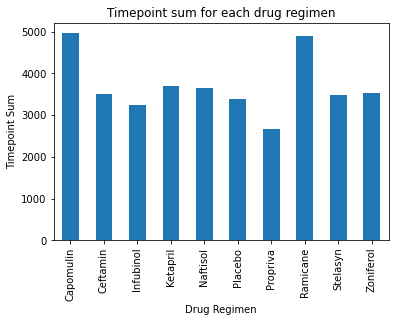

<Figure size 432x288 with 0 Axes>

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoint_groups= clean_data.groupby(['Drug Regimen'])
timepoint_groups_df=timepoint_groups['Timepoint'].sum()
timepoint_groups_df

timepoint_chart = timepoint_groups_df.plot(kind="bar", title="Timepoint sum for each drug regimen")
timepoint_chart.set_xlabel("Drug Regimen")
timepoint_chart.set_ylabel("Timepoint Sum")
plt.show()
plt.tight_layout()

In [12]:
summary= pd.DataFrame({'Total':timepoint_groups_df})
summary=[4960,3515,3235,3705,3650,3380,2665,4885,3480,3525]         

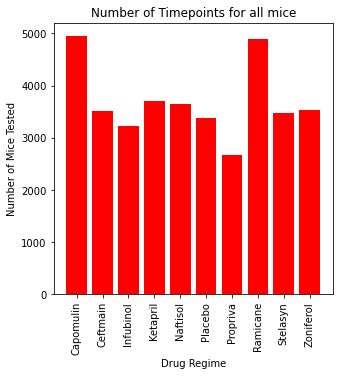

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
Drug_Regimen=["Capomulin","Ceftmain","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"]
x_axis = np.arange(len(summary))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(5,5))

plt.bar(x_axis,summary,color="r", align="center")
plt.xticks(tick_locations, Drug_Regimen, rotation="vertical")
plt.title("Number of Timepoints for all mice")
plt.xlabel("Drug Regime")
plt.ylabel("Number of Mice Tested")
plt.show()

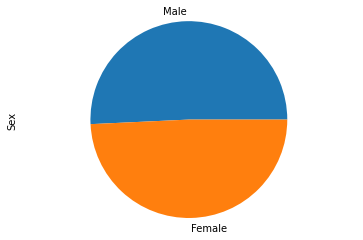

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_summary=clean_data['Sex'].value_counts().plot.pie()

plt.axis('equal')
plt.show()

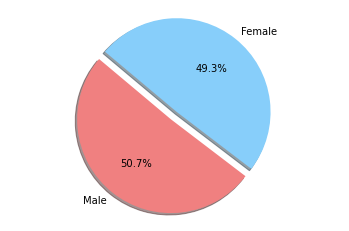

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_summary=[958,930]
sex_label=["Male","Female"]
colors = ["lightcoral", "lightskyblue"]
explode = (0.1, 0,)
plt.pie(sex_summary, explode=explode, labels=sex_label, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimen_summary=clean_data.groupby(['Drug Regimen']).sum()
regimen_summary_df=pd.DataFrame(regime_summary)
#getting the last (greatest) timepoint for each mouse
max_total= clean_data.groupby(['Drug Regimen'])['Timepoint'].max()
max_total_df=pd.DataFrame(max_total)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_df = pd.merge(clean_data, max_total_df, on=('Drug Regimen', 'Timepoint'), how='right')
last_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,s185,Capomulin,Female,3,17,45,23.343598,1
1,x401,Capomulin,Female,16,15,45,28.484033,0
2,m601,Capomulin,Male,22,17,45,28.430964,1
3,u364,Capomulin,Male,18,17,45,31.023923,3
4,y793,Capomulin,Male,17,17,45,31.896238,2
...,...,...,...,...,...,...,...,...
125,p136,Zoniferol,Female,5,28,45,63.488697,2
126,q511,Zoniferol,Female,2,28,45,68.611061,3
127,q633,Zoniferol,Male,12,25,45,70.827796,2
128,s337,Zoniferol,Male,14,27,45,62.109651,4


In [125]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_cap = []
tumor_ram = []
tumor_inf = []
tumor_cef = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
capo_table = clean_data[clean_data["Drug Regimen"].isin(["Capomulin"])]
capo_table = capo_table.sort_values(["Mouse ID", "Timepoint"], ascending=[False, False])
capo_table = capo_table.drop_duplicates(subset='Mouse ID', keep="first")
capo_table = capo_table.sort_values("Tumor Volume (mm3)", ascending=False)
tumor_cap= capo_table["Tumor Volume (mm3)"]
quartile1 = tumor_cap.quantile([0.25,0.5, 0.75])
quartile=pd.DataFrame(quartile1)
quartile.head()
#quartile=[{'0.25':32.377,'0.50':38.125,'0.75':40.159}]
lowerq = quartile.head().min()
upperq = quartile.head().max()
iqr = upperq-lowerq
    # Locate the rows which contain mice on each drug and get the tumor volumes
print(f"IQR for Capomulin")
print(f"The lower quartile of final tumor volume is: {lowerq}")
print(f"The upper quartile of final tumor volume is: {upperq}")
print(f"The interquartile range of final tumor volume is: {iqr}")
   

    # add subset 

    # Determine outliers using upper and lower bounds
lower_bound1 = lowerq - (1.5*iqr)
upper_bound1 = upperq + (1.5*iqr)
print(f"Values below {lower_bound1} could be outliers.")
print(f"Values above {upper_bound1} could be outliers.")

IQR for Capomulin
The lower quartile of final tumor volume is: Tumor Volume (mm3)    32.377357
dtype: float64
The upper quartile of final tumor volume is: Tumor Volume (mm3)    40.15922
dtype: float64
The interquartile range of final tumor volume is: Tumor Volume (mm3)    7.781863
dtype: float64
Values below Tumor Volume (mm3)    20.704562
dtype: float64 could be outliers.
Values above Tumor Volume (mm3)    51.832015
dtype: float64 could be outliers.


In [130]:
rami_table = clean_data[clean_data["Drug Regimen"].isin(["Ramicane"])]
rami_table = rami_table.sort_values(["Mouse ID", "Timepoint"], ascending=[False, False])
rami_table = rami_table.drop_duplicates(subset= 'Mouse ID', keep ="first")
rami_table = rami_table.sort_values("Tumor Volume (mm3)", ascending=False)
tumor_ram = rami_table["Tumor Volume (mm3)"]

quartile_rami = tumor_ram.quantile([.25, .5, .75])
quartile2=pd.DataFrame(quartile_rami)
quartile2.head()

lowerq2 = quartile2.head().min()
upperq2 = quartile2.head().max()
iqr2 = upperq2-lowerq2

print(f"IQR for Ramicane")
print(f"The lower quartile of final tumor volume is: {lowerq2}")
print(f"The upper quartile of final tumor volume is: {upperq2}")
print(f"The interquartile range of final tumor volume is: {iqr2}")

lower_bound2 = lowerq2 - (2.5*iqr2)
upper_bound2 = upperq2 + (2.5*iqr2)
print(f"Values below {lower_bound2} could be outliers.")
print(f"Values above {upper_bound2} could be outliers.")




IQR for Ramicane
The lower quartile of final tumor volume is: Tumor Volume (mm3)    31.56047
dtype: float64
The upper quartile of final tumor volume is: Tumor Volume (mm3)    40.659006
dtype: float64
The interquartile range of final tumor volume is: Tumor Volume (mm3)    9.098537
dtype: float64
Values below Tumor Volume (mm3)    8.814128
dtype: float64 could be outliers.
Values above Tumor Volume (mm3)    63.405348
dtype: float64 could be outliers.


In [135]:
infu_table= clean_data[clean_data["Drug Regimen"].isin(["Infubinol"])]
infu_table = infu_table.sort_values(["Mouse ID", "Timepoint"], ascending=[False, False])
infu_table = infu_table.drop_duplicates(subset= 'Mouse ID', keep ="first")
infu_table = infu_table.sort_values("Tumor Volume (mm3)", ascending=False)
tumor_inf= infu_table["Tumor Volume (mm3)"]

quartile_inf = tumor_inf.quantile([.25, .5, .75])
quartile3=pd.DataFrame(quartile_inf)
quartile3.head()

lowerq3 = quartile3.head().min()
upperq3 = quartile3.head().max()
iqr3 = upperq3-lowerq3

print(f"IQR for Infubinol")
print(f"The lower quartile of final tumor volume is: {lowerq3}")
print(f"The upper quartile of final tumor volume is: {upperq3}")
print(f"The interquartile range of final tumor volume is: {iqr3}")

lower_bound3 = lowerq3 - (2.5*iqr3)
upper_bound3 = upperq3 + (2.5*iqr3)
print(f"Values below {lower_bound3} could be outliers.")
print(f"Values above {upper_bound3} could be outliers.")

IQR for Infubinol
The lower quartile of final tumor volume is: Tumor Volume (mm3)    54.048608
dtype: float64
The upper quartile of final tumor volume is: Tumor Volume (mm3)    65.525743
dtype: float64
The interquartile range of final tumor volume is: Tumor Volume (mm3)    11.477135
dtype: float64
Values below Tumor Volume (mm3)    25.35577
dtype: float64 could be outliers.
Values above Tumor Volume (mm3)    94.218581
dtype: float64 could be outliers.


In [142]:
ceft_table= clean_data[clean_data["Drug Regimen"].isin(["Ceftamin"])]
ceft_table = ceft_table.sort_values(["Mouse ID", "Timepoint"], ascending=[False, False])
ceft_table = ceft_table.drop_duplicates(subset= 'Mouse ID', keep ="first")
ceft_table = ceft_table.sort_values("Tumor Volume (mm3)", ascending=False)
tumor_cef = ceft_table["Tumor Volume (mm3)"]

quartile_cef = tumor_cef.quantile([.25, .5, .75])
quartile4=pd.DataFrame(quartile_cef)
quartile4.head()

lowerq4 = quartile4.head().min()
upperq4 = quartile4.head().max()
iqr4 = upperq4-lowerq4

print(f"IQR for Ceftamin")
print(f"The lower quartile of final tumor volume is: {lowerq4}")
print(f"The upper quartile of final tumor volume is: {upperq4}")
print(f"The interquartile range of final tumor volume is: {iqr4}")

lower_bound4 = lowerq4 - (1.5*iqr4)
upper_bound4 = upperq4 + (1.5*iqr4)
print(f"Values below {lowerq4} could be outliers.")
print(f"Values above {upperq4} could be outliers.")

IQR for Ceftamin
The lower quartile of final tumor volume is: Tumor Volume (mm3)    48.722078
dtype: float64
The upper quartile of final tumor volume is: Tumor Volume (mm3)    64.29983
dtype: float64
The interquartile range of final tumor volume is: Tumor Volume (mm3)    15.577752
dtype: float64
Values below Tumor Volume (mm3)    48.722078
dtype: float64 could be outliers.
Values above Tumor Volume (mm3)    64.29983
dtype: float64 could be outliers.


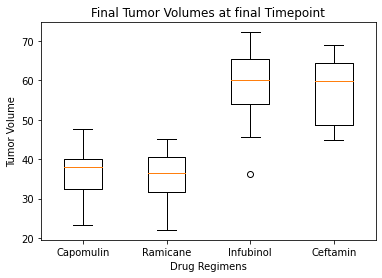

In [144]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data = []
data.append(tumor_cap)
data.append(tumor_ram)
data.append(tumor_inf)
data.append(tumor_cef)

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volumes at final Timepoint')
ax1.set_ylabel('Tumor Volume')
ax1.set_xlabel('Drug Regimens')
ax1.boxplot(data, labels=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])

plt.show()

## Line and Scatter Plots

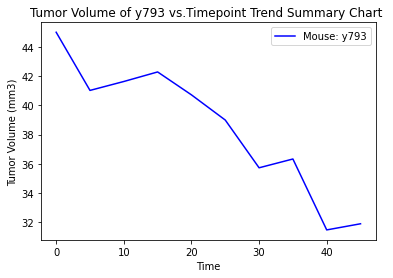

In [148]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Mouse = "y793"
Mouse_df = clean_data[["Mouse ID", "Timepoint","Tumor Volume (mm3)"]]
Mouse_df = Mouse_df.sort_values("Timepoint", ascending=True)
Specific_Mouse = Mouse_df[(Mouse_df["Mouse ID"] == Mouse)]

Mouse_Handle = plt.plot(Specific_Mouse["Timepoint"], Specific_Mouse["Tumor Volume (mm3)"], color="blue", label="Mouse: " + Mouse)

plt.title(f"Tumor Volume of {Mouse} vs.Timepoint Trend Summary Chart ")
plt.xlabel("Time")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc="best")

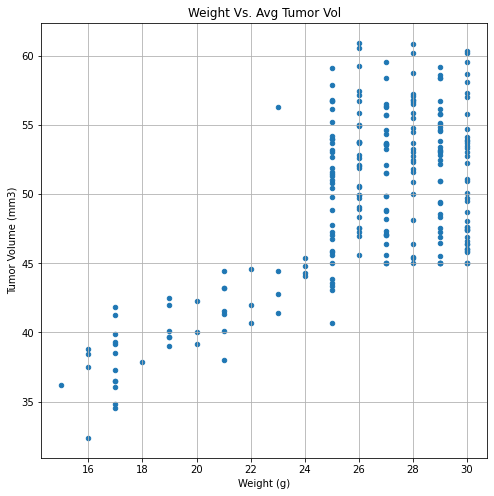

In [156]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin =clean_data[(clean_data["Drug Regimen"] == "Capomulin")]
Capomulin = Capomulin[["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
Capomulin = clean_data.groupby("Mouse ID").mean()
Capomulin = Capomulin.reset_index()
Capomulin.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=True, figsize=(8,8), title="Weight Vs. Avg Tumor Volume")

plt.show()

## Correlation and Regression

In [157]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight = Capomulin.iloc[:, 1]
tumor_volume = Capomulin.iloc[:, 2]
correlation = st.pearsonr(weight, tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.02


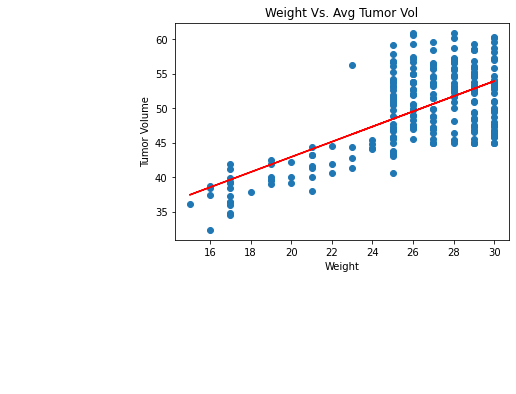

In [159]:
from scipy.stats import linregress
x_values = Capomulin["Weight (g)"]
y_values = Capomulin["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=10,color="red")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume")
plt.title("Weight Vs. Avg Tumor Vol")
plt.show()
